In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
import collections

import warnings
warnings.filterwarnings('ignore')

# Utils
file_path = os.getcwd()
utils_path = os.path.abspath(os.path.join(file_path, '../src/models'))
sys.path.append(utils_path)
import utils_models

utils_path = os.path.abspath(os.path.join(file_path, '../src/data'))
sys.path.append(utils_path)
import utils_data

In [2]:
DATADIR = '../data/processed/from_ccle_org'
OURDIR = os.path.join(file_path, 't-sne')
os.makedirs(OURDIR, exist_ok=True)

In [3]:
def plot_2d(df, figsize=(8, 5),
            color_vector=None, marker_vector=None,
            to_scale=False, title=None, verbose=True):
    """
    Apply PCA to input df.
    Args:
        color_vector : each element corresponds to a row in df. The unique elements will be colored
            with a different color.
        marker_vector : each element corresponds to a row in df. The unique elements will be marked
            with a different marker.
    Returns:
        pca_obj : object of sklearn.decomposition.PCA()
        pca : pca matrix
        fig : PCA plot figure handle

    https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib
    """
    if color_vector is not None:
        assert len(df) == len(color_vector), 'len(df) and len(color_vector) must be the same size.'
        n_colors = len(np.unique(color_vector))
        colors = cm.rainbow(np.linspace(0, 1, n_colors))

    if marker_vector is not None:
        assert len(df) == len(marker_vector), 'len(df) and len(marker_vector) shuold be the same size.'
        all_markers = ('o', 'v', 's', 'p', '^', '<', '>', '8', '*', 'h', 'H', 'D', 'd', 'P', 'X')
        markers = all_markers[:len(np.unique(marker_vector))]

    df = df.copy()

    # PCA
    if to_scale:
        from sklearn.preprocessing import StandardScaler
        xx = StandardScaler().fit_transform(df.values)
    else:
        xx = df.values

    # Start plotting
    fig, ax = plt.subplots(figsize=figsize)

    if (color_vector is not None) and (marker_vector is not None):
        for i, marker in enumerate(np.unique(marker_vector)):
            for i, color in enumerate(np.unique(color_vector)):
                # print(i, 'marker:', marker, 'color:', color)
                idx = (marker_vector == marker) & (color_vector == color)
                ax.scatter(xx[idx, 0], xx[idx, 1], alpha=0.7,
                           marker=markers[i],
                           edgecolors='black',
                           color=colors[i],
                           label='{}, {}'.format(marker, color))

    elif (color_vector is not None):
        for i, color in enumerate(np.unique(color_vector)):
            idx = (color_vector == color)
            ax.scatter(xx[idx, 0], xx[idx, 1], alpha=0.7,
                       marker='o',
                       edgecolors='black',
                       color=colors[i],
                       label='{}'.format(color))

    elif (marker_vector is not None):
        for i, marker in enumerate(np.unique(marker_vector)):
            idx = (marker_vector == marker)
            ax.scatter(xx[idx, 0], xx[idx, 1], alpha=0.7,
                       marker=markers[i],
                       edgecolors='black',
                       color='blue',
                       label='{}'.format(marker))

    else:
        ax.scatter(xx[:, 0], xx[:, 1], alpha=0.7,
                   marker='s', edgecolors='black', color='blue')

    if title: ax.set_title(title)
    ax.legend(loc='lower left', bbox_to_anchor= (1.01, 0.0), ncol=1,
              borderaxespad=0, frameon=True)

    return fig

In [4]:
# Load data
vsd = pd.read_csv(os.path.join(DATADIR, 'ccle_vsd_lincs.txt'), sep='\t').reset_index(drop=True)
rpk = pd.read_csv(os.path.join(DATADIR, 'ccle_rpkm_lincs.txt'), sep='\t').reset_index(drop=True)
cmeta = pd.read_csv(os.path.join(DATADIR, 'ccle_cmeta.txt'), sep='\t').reset_index(drop=True)
vsd.rename(columns={'CCLEName': 'CELL'}, inplace=True)
rpk.rename(columns={'CCLEName': 'CELL'}, inplace=True)
cmeta.rename(columns={'CCLEName': 'CELL'}, inplace=True)
print(vsd.shape)
print(rpk.shape)
print(cmeta.shape)
# display(rspc.groupby('SOURCE').agg({'CELL': 'nunique', 'DRUG': 'nunique'}).reset_index())
# display(rspc[:2])

(472, 966)
(472, 966)
(472, 3)


In [5]:
display(vsd[:2])
display(rpk[:2])
display(cmeta[:2])

,CELL,ENSG00000000003,ENSG00000000457,ENSG00000002330,ENSG00000002549,ENSG00000002919,ENSG00000003400,ENSG00000003402,ENSG00000004478,ENSG00000004534,...,ENSG00000215440,ENSG00000221869,ENSG00000225190,ENSG00000243279,ENSG00000245848,ENSG00000247596,ENSG00000253293,ENSG00000254087,ENSG00000254505,ENSG00000256525
0,CHP212_AUTONOMIC_GANGLIA,12.309091,11.475432,9.894101,12.843312,11.766434,8.538439,11.126791,14.233595,13.783685,...,8.359945,9.494836,12.532273,9.449287,8.882884,10.990186,8.552720,11.574032,9.876630,12.361548
1,IMR32_AUTONOMIC_GANGLIA,12.520236,11.062534,9.755513,12.819448,12.258025,8.500345,9.462406,15.789938,14.038316,...,8.474596,10.096953,12.589378,10.266440,9.423651,10.562886,8.522044,10.682971,9.795276,12.372766


,CELL,ENSG00000000003,ENSG00000000457,ENSG00000002330,ENSG00000002549,ENSG00000002919,ENSG00000003400,ENSG00000003402,ENSG00000004478,ENSG00000004534,...,ENSG00000215440,ENSG00000221869,ENSG00000225190,ENSG00000243279,ENSG00000245848,ENSG00000247596,ENSG00000253293,ENSG00000254087,ENSG00000254505,ENSG00000256525
0,CHP212_AUTONOMIC_GANGLIA,14.77365,8.05089,7.54524,20.19786,9.12968,0.00744,1.81805,49.73148,23.98410,...,0.00000,0.97064,6.64523,7.37629,0.16386,23.86305,0.01877,7.05591,4.69495,16.21609
1,IMR32_AUTONOMIC_GANGLIA,15.03082,4.77485,5.30005,17.10918,11.74780,0.00397,0.19405,129.06647,24.87176,...,0.03408,2.09944,5.99050,21.45539,0.60509,13.34139,0.01145,2.63928,3.59273,14.11097


,CELL,tissuetype,sizeFactor
0,CHP212_AUTONOMIC_GANGLIA,AUTONOMIC_GANGLIA,1.191532
1,IMR32_AUTONOMIC_GANGLIA,AUTONOMIC_GANGLIA,0.963381


In [25]:
val_cnt = cmeta['tissuetype'].value_counts()
print(len(val_cnt))
val_cnt[:10]

KeyError: 'tissuetype'

In [9]:
types_to_keep = 7
if types_to_keep is not None:
    cmeta = cmeta[cmeta['tissuetype'].isin(val_cnt[:types_to_keep].index)].reset_index(drop=True)
    vsd = pd.merge(cmeta[['CELL']], vsd, on='CELL', how='left').reset_index(drop=True)
    rpk = pd.merge(cmeta[['CELL']], rpk, on='CELL', how='left').reset_index(drop=True)
    
print(cmeta.shape)

(302, 3)


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Process VSD

In [11]:
df = vsd
color_vector = cmeta['tissuetype']

pca = PCA(n_components=200)
pca_vsd = pd.DataFrame(pca.fit_transform(df.iloc[:,1:]))
print('Variance explained pca_vsd ({} dims): {}'.format(
    len(pca.explained_variance_ratio_),
    sum(pca.explained_variance_ratio_)))

Variance explained pca_vsd (200 dims): 0.9734866154219439


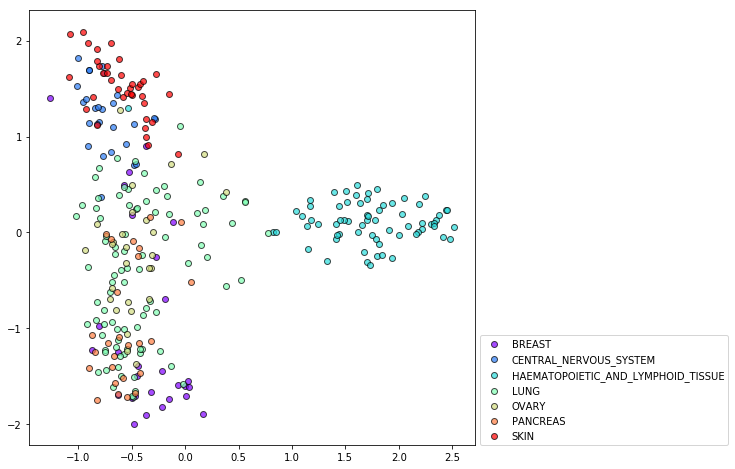

In [12]:
plot_2d(df=pca_vsd, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=True, title=None, verbose=True);

In [13]:
t0 = time.time()
tsne = TSNE(n_components=2, random_state=0)
tsne_vsd = pd.DataFrame(tsne.fit_transform(pca_vsd))
runtime = time.time() - t0
print('Runtime: {} mins'.format(runtime/60))

Runtime: 0.08535875082015991 mins


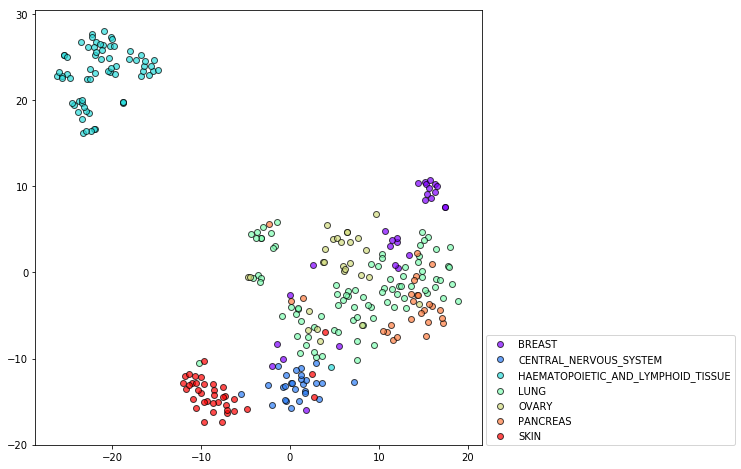

In [14]:
plot_2d(df=tsne_vsd, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=False, title=None, verbose=True);

## Process RPKM

In [15]:
df = rpk
color_vector = cmeta['tissuetype']

pca = PCA(n_components=200)
pca_rpk = pd.DataFrame(pca.fit_transform(df.iloc[:,1:]))
print('Variance explained pca_vsd ({} dims): {}'.format(
    len(pca.explained_variance_ratio_),
    sum(pca.explained_variance_ratio_)))

Variance explained pca_vsd (200 dims): 0.9972655016711874


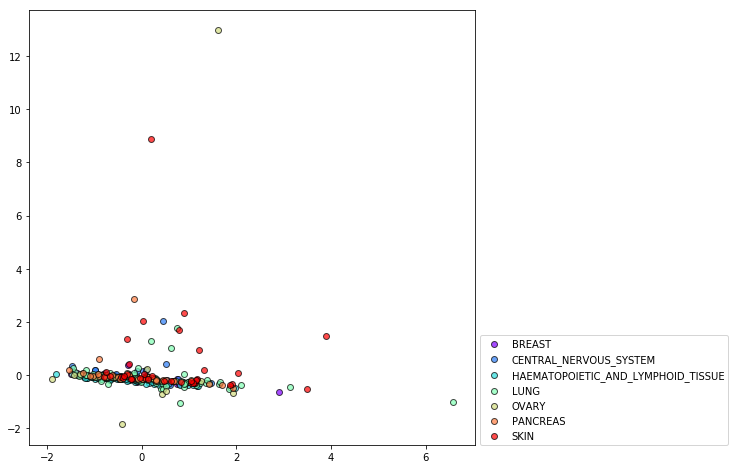

In [16]:
plot_2d(df=pca_rpk, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=True, title=None, verbose=True);

In [17]:
t0 = time.time()
tsne = TSNE(n_components=2, random_state=0)
tsne_rpk = pd.DataFrame(tsne.fit_transform(pca_rpk))
runtime = time.time() - t0
print('Runtime: {} mins'.format(runtime/60))

Runtime: 0.09345605373382568 mins


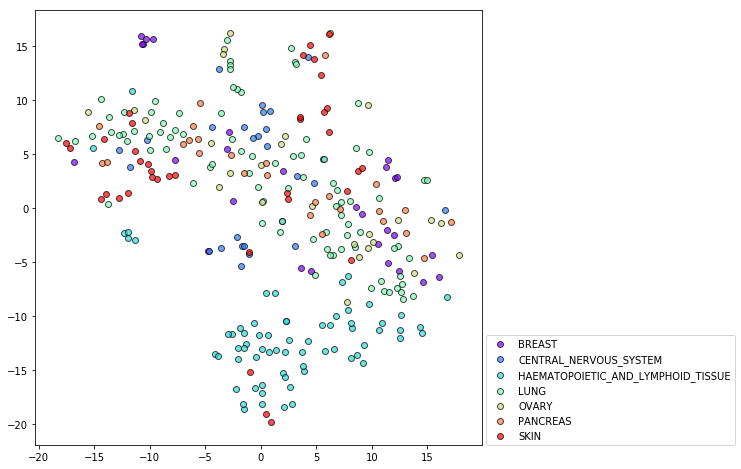

In [18]:
plot_2d(df=tsne_rpk, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=False, title=None, verbose=True);

## Process TPM

In [41]:
# lincs = utils_data.CombinedRNASeqLINCS(dataset='raw', sources=['ccle'])
# tpm, cmeta = lincs._df_rna, lincs._meta
pd.read_csv()


Dataset: combined_rnaseq_data_lincs1000
df_rna (1018, 943)
meta   (1018, 20)
CCLE    1018
Name: Sample, dtype: int64


In [42]:
val_cnt = cmeta['ctype'].value_counts()
print(len(val_cnt))
val_cnt[:10]

65


Lymphoid Leukemia                        68
Lung Adenocarcinoma                      67
Breast Invasive Carcinoma                55
Colon Adenocarcinoma                     54
Skin Cutaneous Melanoma                  54
Lung Small Cell Carcinoma                50
Sarcoma                                  44
NA - not available                       32
Head and Neck Squamous Cell Carcinoma    29
Uterine Corpus Endometrial Carcinoma     28
Name: ctype, dtype: int64

In [43]:
cmeta.rename(columns={'Sample': 'CELL'}, inplace=True)
tpm.rename(columns={'Sample': 'CELL'}, inplace=True)

In [44]:
types_to_keep = 7
if types_to_keep is not None:
    cmeta = cmeta[cmeta['ctype'].isin(val_cnt[:types_to_keep].index)].reset_index(drop=True)
    tpm = pd.merge(cmeta[['CELL']], tpm, on='CELL', how='left').reset_index(drop=True)
    
print(cmeta.shape)

(392, 20)


In [46]:
df = tpm
color_vector = cmeta['ctype']

pca = PCA(n_components=200)
pca_tpm = pd.DataFrame(pca.fit_transform(df.iloc[:,1:]))
print('Variance explained pca_vsd ({} dims): {}'.format(
    len(pca.explained_variance_ratio_),
    sum(pca.explained_variance_ratio_)))

Variance explained pca_vsd (200 dims): 0.9611862242802486


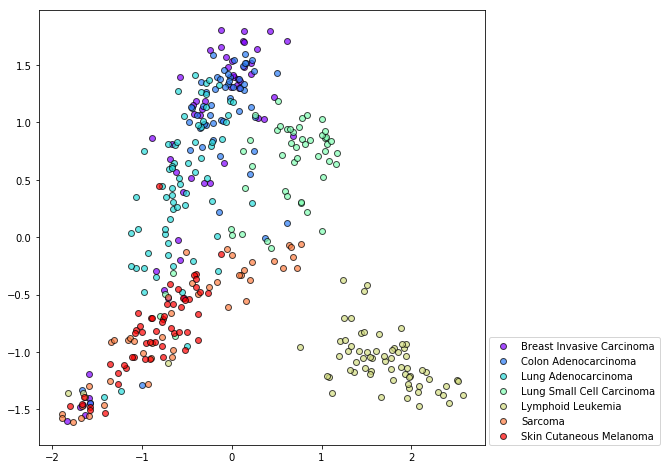

In [47]:
plot_2d(df=pca_tpm, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=True, title=None, verbose=True);

In [48]:
t0 = time.time()
tsne = TSNE(n_components=2, random_state=0)
tsne_tpm = pd.DataFrame(tsne.fit_transform(pca_tpm))
runtime = time.time() - t0
print('Runtime: {} mins'.format(runtime/60))

Runtime: 0.11811313629150391 mins


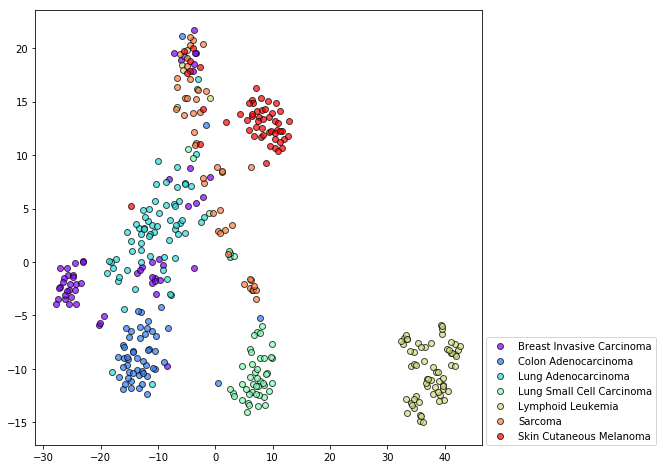

In [49]:
plot_2d(df=tsne_tpm, figsize=(8, 8),
        color_vector=color_vector, marker_vector=None,
        to_scale=False, title=None, verbose=True);

# Fashion-MNIST
https://www.datacamp.com/community/tutorials/introduction-t-sne

In [14]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(
            len(labels), 784)

    return images, labels

In [4]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):
        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [5]:
datapath = '/Users/apartin/Documents/data/fashion-mnist'
xtr, ytr = load_mnist(path=datapath, kind='train')

In [6]:
# Subset first 20k data points to visualize
x_subset = xtr[0:20000]
y_subset = ytr[0:20000]
print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


### PCA

In [7]:
time_start = time.time()
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)
print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.49955201148986816 seconds


In [8]:
pca_df = pd.DataFrame(data=pca_result, columns=['pca1','pca2','pca3','pca4'])
print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


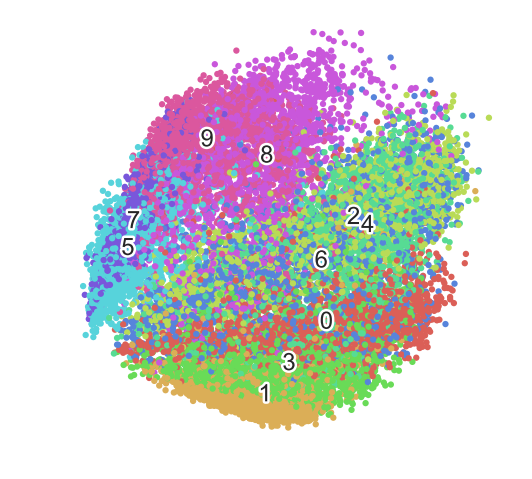

In [9]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset); # Visualizing the PCA output

### t-SNE on raw data

In [10]:
# time_start = time.time()
# fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)
# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [11]:
# fashion_scatter(fashion_tsne, y_subset)

### t-SNE after reducing dim with PCA

In [12]:
time_start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 0.7518439292907715 seconds
Cumulative variance explained by 50 principal components: 0.8625177354677165


In [15]:
time_start = time.time()
fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 613.8053982257843 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(33.9912,4.26503,'0'),
  Text(11.1873,59.4546,'1'),
  Text(15.0319,-40.3021,'2'),
  Text(43.1673,29.6509,'3'),
  Text(32.9216,-33.6629,'4'),
  Text(-36.6024,5.40247,'5'),
  Text(19.022,-18.3532,'6'),
  Text(-61.6327,-14.4145,'7'),
  Text(-22.1925,-34.1532,'8'),
  Text(-41.998,42.5511,'9')])

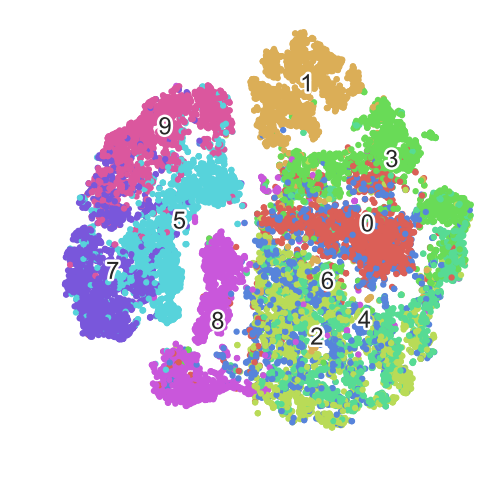

In [16]:
fashion_scatter(fashion_pca_tsne, y_subset);